### Cost of living Index Predictions (Accuracy Score 88.91%)

In [1]:
# Import your dependencies
# Initial imports
import pandas as pd
from path import Path
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn import *

In [2]:
# Read in the encoded dataset from preprocessing
df = pd.read_csv('encoded_dataset.csv')
df

,FIPS,UI_Index,MI_Index,CI_Index,Total_Vaccinated,Vac_Index
0,1001,1,1,0,2288180,0
1,1001,1,1,0,2288180,0
2,1001,1,1,0,2288180,0
3,1001,1,1,0,2288180,0
4,1001,1,1,0,2288180,0
...,...,...,...,...,...,...
41803,56041,0,1,0,268472,0
41804,56043,1,0,0,268472,0
41805,56043,1,0,0,268472,0
41806,56045,1,0,0,268472,0


# Making the models
We will choose different inputs to determine which variables train efficiently

In [3]:
# Predicting Cost of living index using logistic regression
# Cost of Living threshold was determined by equating the index to Boolen datatype, Over Index = 0 , at or below Index = 1
# Results - Accuracy score - 88.91%

In [4]:
# Determine the dependant and independant variables 
X = df.drop(columns ='CI_Index')
y = df['CI_Index']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#instantiate the model
classifier= LogisticRegression(random_state=0)

#fit the model using the training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [5]:
#use model to make predictions on test data
y_pred = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [6]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [7]:
# Create the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10378,   252],
       [ 1139,   774]], dtype=int64)

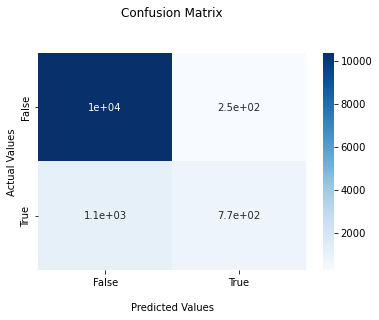

In [8]:
# Plot the Confusion Matrix 
ax = sns.heatmap(cnf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [9]:
### Visualize the Model (Predicting Vaccination Indexes) (Work in Progress)

In [10]:
# # ListedColormap class help us to colorize the data points.
# from matplotlib.axes._axes import _log as matplotlib_axes_logger 
# matplotlib_axes_logger.setLevel('ERROR')

# from matplotlib.colors import ListedColormap
# from sklearn import *

# #Create local variables X_set and y_set. Because we use these #variables again in the test set
# X_set, y_set= X_train, y_train

# #Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
# #X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
# X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
#            np.arange(start =X_set[:,1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))



# #This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
# #points and the blue pixel points. contour function make the contour #between red and blue regions.
# plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
#              cmap = ListedColormap(('red','blue')))

# #plot the limits 
# plt.xlim((X1.min(),X1.max()))
# plt.ylim((X2.min(),X2.max()))


# #This loop here plots all the data points that are the real values.
# for i,j in enumerate(np.unique(y_set)):
#      plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
        
# #Add the name of the plot and the labels.
# plt.title('Logistic Regression (Training)')
# plt.xlabel('Indexes')
# plt.ylabel('%Vaccinated is above or below Threshold')
# plt.legend()
# plt.show()   

In [11]:
# from matplotlib.colors import ListedColormap
# X_set, y_set= X_test, y_test
# X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
#                     np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
# plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
#              cmap = ListedColormap(('red','blue')))
# plt.xlim((X1.min(),X1.max()))
# plt.ylim((X2.min(),X2.max()))
# for i,j in enumerate(np.unique(y_set)):
#      plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 
# plt.title('Logistic Regression(Test Set)')
# plt.xlabel('Indexes')
# plt.ylabel('%Vaccinated is above or below Threshold')
# plt.legend()
# plt.show()

In [12]:
# Print the accuracy score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8891014908714023


In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     10630
           1       0.75      0.40      0.53      1913

    accuracy                           0.89     12543
   macro avg       0.83      0.69      0.73     12543
weighted avg       0.88      0.89      0.87     12543

